In [1]:
import pandas as pd
from sklearn.datasets import load_digits

digits=load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

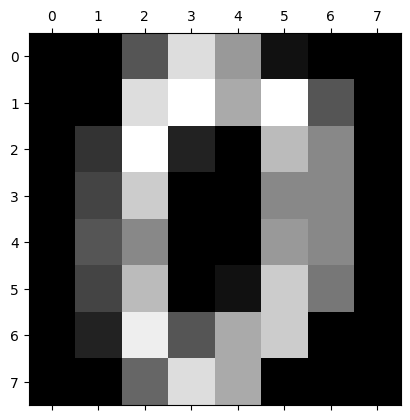

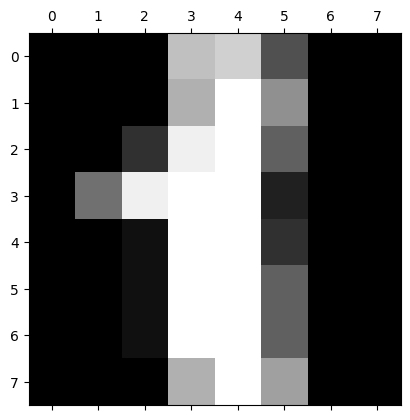

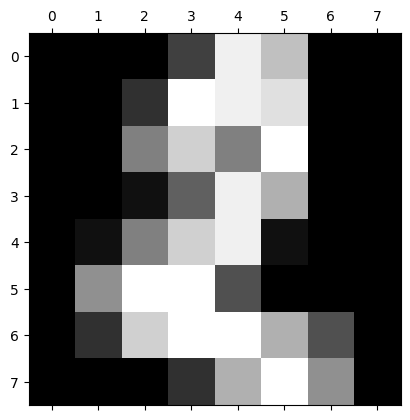

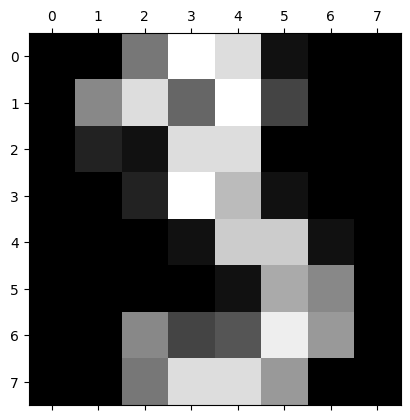

In [3]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])
plt.show()

In [4]:
df=pd.DataFrame(digits.data)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df["target"]=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
df.target.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(['target'],axis=1),df.target,test_size=0.2)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [12]:
y_predicted=model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predicted,y_test)
cm

array([[35,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 33]], dtype=int64)

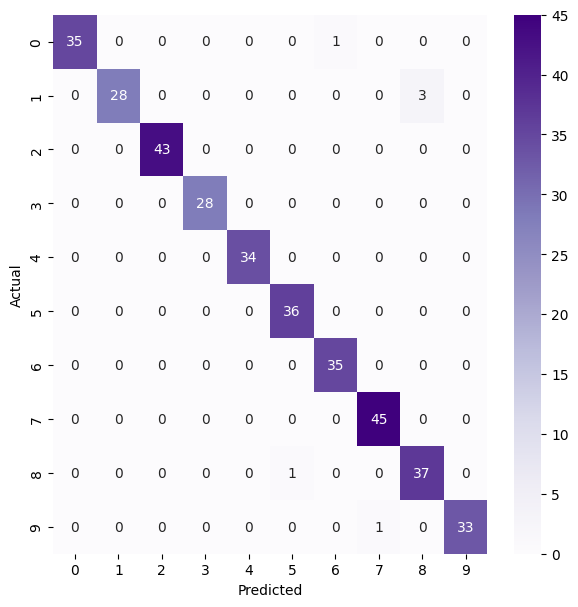

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import joblib

# 1. GUI to draw
canvas_size = 200
image_size = 8

class DrawApp:
    def __init__(self, model):
        self.root = tk.Tk()
        self.root.title("Draw a digit (0–9)")
        self.canvas = tk.Canvas(self.root, width=canvas_size, height=canvas_size, bg='white')
        self.canvas.pack()
        self.button = tk.Button(self.root, text="Predict", command=self.predict_digit)
        self.button.pack()

        self.canvas.bind("<B1-Motion>", self.draw)

        self.image = Image.new("L", (canvas_size, canvas_size), color=255)
        self.drawn = ImageDraw.Draw(self.image)
        self.model = model

    def draw(self, event):
        x, y = event.x, event.y
        r = 8
        self.canvas.create_oval(x-r, y-r, x+r, y+r, fill='black')
        self.drawn.ellipse((x-r, y-r, x+r, y+r), fill=0)

    def preprocess(self):
        # Resize to 8x8, invert colors, normalize to 0-16
        img_resized = self.image.resize((8, 8), Image.Resampling.LANCZOS)
        img_array = np.array(img_resized)
        img_array = 255 - img_array  # Invert
        img_array = (img_array / 255.0) * 16  # Scale to 0–16 like sklearn
        img_array = img_array.astype(np.int32).flatten().reshape(1, -1)
        return img_array

    def predict_digit(self):
        X = self.preprocess()
        prediction = self.model.predict(X)[0]
        print(f"Predicted Digit: {prediction}")
        tk.messagebox.showinfo("Prediction", f"Predicted Digit: {prediction}")

    def run(self):
        self.root.mainloop()


# 2. Load your trained RF model
rf_model = joblib.load("rf_model.pkl")  # Make sure this file exists

# 3. Run the drawing app
app = DrawApp(rf_model)
app.run()


FileNotFoundError: [Errno 2] No such file or directory: 'rf_model.pkl'